In [1]:
import os
import cv2 as cv

In [2]:
#scaling
import numpy as np
import os
import cv2 as cv
loc = r'im2.jpg'
imag = cv.imread(loc)
assert imag is not None, "file could not be read, check with os.path.exists()"
rows,cols, _ = imag.shape
M = np.float32([[0.5,0,0],[0,0.5,0],[0,0,1]])
dst = cv.warpPerspective(imag,M,(cols,rows))  
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
#Translation
loc = r'F:\SEMESTER (4-2)\DIP\image1.jpg'
img = cv.imread(loc, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50],[0,0,1]])
dst = cv.warpPerspective(img,M,(cols,rows))   #output image is same as the input image. just the translation is happening
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
#rotation
import numpy as np
import cv2 as cv
loc = r'F:\SEMESTER (4-2)\DIP\image1.jpg'
img = cv.imread(loc, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
print(M)
a = [[0, 0 , 1]]
T = np.append(M, a, axis=0)
print(T)

[[  0.70710678   0.70710678 -53.34628381]
 [ -0.70710678   0.70710678 270.21067812]]
[[  0.70710678   0.70710678 -53.34628381]
 [ -0.70710678   0.70710678 270.21067812]
 [  0.           0.           1.        ]]


In [3]:
dst = cv.warpPerspective(img,T,(cols,rows))  
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
#sheared
loc = r'F:\SEMESTER (4-2)\DIP\image1.jpg'
img = cv.imread(loc, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
M = np.float32([[1,0.8,0],[0,1,0],[0,0,1]])
dst = cv.warpPerspective(img,M,(cols,rows))   #output image is same as the input image. just the translation is happening
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

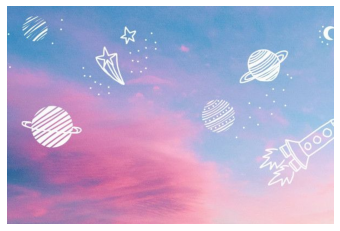

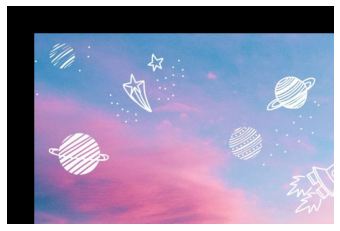

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read the input image
loc = r'F:\SEMESTER (4-2)\DIP\image1.jpg'
img = cv2.imread(loc)
# convert from BGR to RGB so we can plot using matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(img)
plt.show()
# get the image shape
rows, cols, dim = img.shape
# transformation matrix for translation
M = np.float32([[1, 0, 50],
                [0, 1, 50],
                [0, 0, 1]])
# apply a perspective transformation to the image
translated_img = cv2.warpPerspective(img, M, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(translated_img)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()


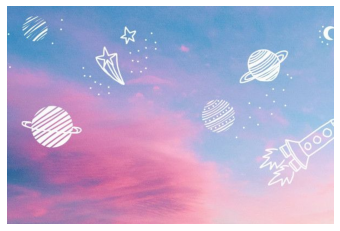

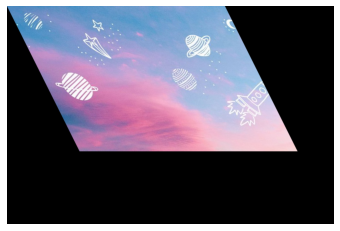

In [21]:
#Shearing an Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read the input image
loc = r'F:\SEMESTER (4-2)\DIP\image1.jpg'
img = cv2.imread(loc)
# convert from BGR to RGB so we can plot using matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(img)
plt.show()
# get the image shape
rows, cols, dim = img.shape
# transformation matrix for Shearing
# shearing applied to x-axis
M = np.float32([[1, 0.5, 0],
                [0, 1  , 0],
                [0, 0  , 1]])
# shearing applied to y-axis
# M = np.float32([[1,   0, 0],
#                 [0.5, 1, 0],
#                 [0,   0, 1]])
# apply a perspective transformation to the image                
sheared_img = cv2.warpPerspective(img,M,(int(cols*1.5),int(rows*1.5)))#screen is 1.5 times of the original image height and width 
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(sheared_img)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
############ Video of Zooming the image

import cv2
import numpy as np

# Set image file and output video file
image_file = r'im2.jpg'
output_video_file = 'output_video.avi'

# Load the image
imag = cv2.imread(image_file)
if imag is None:
    print("Error: Unable to load the image.")
    exit()

# Define video properties
frame_width = imag.shape[1]
frame_height = imag.shape[0]
fps = 30  # Frames per second
duration = 10  # Duration of the video in seconds
zoom_steps = 100  # Number of zoom steps
image = []

# Calculate the center of the image
center_x = frame_width // 2
center_y = frame_height // 2

for step in range(zoom_steps):
    zoom_factor = 1 + step / zoom_steps  # Adjust the zoom factor

    # Adjust the center of the zoom operation to the middle of the image
    M = np.float32([[zoom_factor, 0, (1 - zoom_factor) * center_x],  #instead of (0,0) position i am starting from the middle point
                    [0, zoom_factor, (1 - zoom_factor) * center_y],
                    [0, 0, 1]])

    dst = cv2.warpPerspective(imag, M, (frame_width, frame_height))
    image.extend([dst] * (fps // duration))  # Add frames for the duration of each zoom step. to create a video effect where a single frame is displayed for a certain duration.
    #this extend is used so that the a frame remains same for a certain period of time.
    #extend is used to add multiple data point
    
# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  #specifying video compression algorithm. gives some int values
out = cv2.VideoWriter(output_video_file, fourcc, fps, (frame_width, frame_height))

# Write frames to the video
for img in image:
    out.write(img)

# Release the VideoWriter object
out.release()

print(f"Video '{output_video_file}' created successfully.")


Video 'output_video.avi' created successfully.


Video 'output_video2.avi' created successfully.


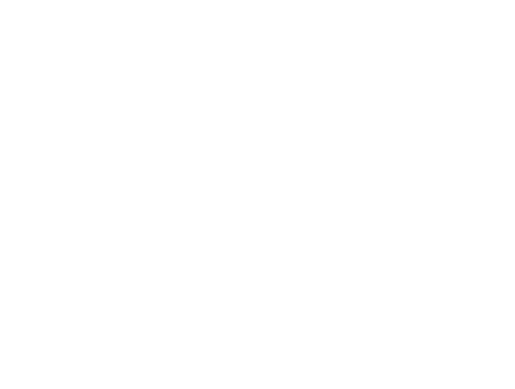

In [9]:
################## Video of Rotating Image


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set image file and output video file
image_file = r'im2.jpg'
output_video_file = 'output_video2.avi'

# Load the image
imag = cv2.imread(image_file)
if imag is None:
    print("Error: Unable to load the image.")
    exit()

# Define video properties
# get the image shape
rows,cols, dim = imag.shape
fps = 36  # Frames per second
duration = 1  # Duration of the video in seconds
image = []

for i in range(0, 360):   
    M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),i,1)
    #print(M)
    a = [[0, 0 , 1]]
    T = np.append(M, a, axis=0)
    dst = cv2.warpPerspective(imag,T,(int(cols*2),int(rows*2))) 
    image.append(dst)

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_file, fourcc, fps, (int(cols),int(rows)))

# Repeat the images to create the video
for _ in range(int(fps * duration)):
    for img in image:
        plt.axis('off')
        out.write(img)

# Release the VideoWriter object
out.release()

print(f"Video '{output_video_file}' created successfully.")


In [10]:
############ Video of Shearing the image

import cv2
import numpy as np

# Set image file and output video file
image_file = r'im2.jpg'
output_video_file = 'output_video3.avi'

# Load the image
imag = cv2.imread(image_file)
if imag is None:
    print("Error: Unable to load the image.")
    exit()

# Define video properties
rows,cols, dim = imag.shape
fps = 30  # Frames per second
duration = 10  # Duration of the video in seconds
sheared_steps = 100  # Number of zoom steps
image = []

# Calculate the center of the image
center_x = cols // 2
center_y = rows // 2

for step in range(sheared_steps):
    sheared_factor =   step / sheared_steps  # Adjust the zoom factor

    # Adjust the center of the zoom operation to the middle of the image
    M = np.float32([[1, sheared_factor, 0],  
                    [0, 1, 0],
                    [0, 0, 1]])

    dst = cv2.warpPerspective(imag, M, (int(cols*1.5),int(rows*1.5)))
    image.extend([dst] * (fps // duration))  # Add frames for the duration of each zoom step. to create a video effect where a single frame is displayed for a certain duration.
    #this extend is used so that the a frame remains same for a certain period of time.
    
# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_file, fourcc, fps, (int(cols*1.5),int(rows*1.5)))

# Write frames to the video
for img in image:
    out.write(img)

# Release the VideoWriter object
out.release()

print(f"Video '{output_video_file}' created successfully.")


Video 'output_video3.avi' created successfully.


In [6]:
##### Video of Image Translation
############ Video of Zooming the image

import cv2
import numpy as np

# Set image file and output video file
image_file = r'im2.jpg'
output_video_file = 'output_video4.avi'

# Load the image
imag = cv2.imread(image_file)

if imag is None:
    print("Error: Unable to load the image.")
    exit()

# Define video properties
frame_width = imag.shape[1]
frame_height = imag.shape[0]
fps = 30  # Frames per second
duration = 10  # Duration of the video in seconds
translated_steps = 100
image = []

# Calculate the center of the image
center_x = frame_width 
center_y = frame_height 

for step in range(translated_steps):
    M = np.float32([[1, 0, step ],  #instead of (0,0) position i am starting from the middle point
                    [0, 1, step],
                    [0, 0, 1]])

    dst = cv2.warpPerspective(imag, M, (frame_width, frame_height))
    image.extend([dst] * (fps // duration))  # Add frames for the duration of each zoom step. to create a video effect where a single frame is displayed for a certain duration.
    #this extend is used so that the a frame remains same for a certain period of time.
    
# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_file, fourcc, fps, (frame_width, frame_height))

# Write frames to the video
for img in image:
    out.write(img)

# Release the VideoWriter object
out.release()

print(f"Video '{output_video_file}' created successfully.")



Video 'output_video4.avi' created successfully.


In [7]:
import cv2
import numpy as np

# Define the video file paths
video_files = ['output_video.avi', 'output_video2.avi','output_video3.avi', 'output_video4.avi']

# Open the video files
cap1 = cv2.VideoCapture(video_files[0])
cap2 = cv2.VideoCapture(video_files[1])
cap3 = cv2.VideoCapture(video_files[2])
cap4 = cv2.VideoCapture(video_files[3])


# Check if the videos opened successfully
if not (cap1.isOpened() and cap2.isOpened() and cap3.isOpened() and cap4.isOpened()):
    print("One or more videos could not be opened.")
    exit()

# Get the video frame dimensions
frame_width = int(cap1.get(3)) #3 defines video width
frame_height = int(cap1.get(4)) #4 defines video height


# Create a video writer to save the output video
output_file = "output_video_final.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use appropriate codec for your desired output format
out = cv2.VideoWriter(output_file, fourcc, 30, (2 * frame_width, 2 * frame_height))

while True:
    ret1, frame1 = cap1.read()   #ret stores the status of the frame. it gives either true or false as valuse. true means there is frame and it can be processed. false means there are no more frame for read
    ret2, frame2 = cap2.read()   #frame stores the frames of the 
    ret3, frame3 = cap3.read()
    ret4, frame4 = cap4.read()

    if not (ret1 and ret2 and ret3 and ret4):
        break

    # Resize frames to the same dimensions
    frame1 = cv2.resize(frame1, (frame_width, frame_height))
    frame2 = cv2.resize(frame2, (frame_width, frame_height))
    frame3 = cv2.resize(frame3, (frame_width, frame_height))
    frame4 = cv2.resize(frame4, (frame_width, frame_height))
    

    # Create an empty frame with subplots
    empty_frame = np.zeros((2 * frame_height, 2 * frame_width, 3), dtype=np.uint8)

    # Place each video frame in a subplot
    empty_frame[:frame_height, :frame_width] = frame1
    empty_frame[:frame_height, frame_width:] = frame2
    empty_frame[frame_height:, :frame_width] = frame3
    empty_frame[frame_height:, frame_width:] = frame4
   
    # Write the combined frame to the output video
    out.write(empty_frame)

# Release the video capture and writer objects
cap1.release()
cap2.release()
cap3.release()
cap4.release()
out.release()

print("Output video saved as:", output_file)



Output video saved as: output_video_final.mp4
